In [2]:
#visualize the traing results
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import glob
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator

In [59]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def shade_plot(q,s,ax,name,color,marker,a=1,alpha=0.25):
    y=np.mean(q,axis=0)
    std=np.std(q,axis=0)
    y1=y+a*std
    y2=y-a*std
    ax.plot(s,y,color=color,label=name,lw=2,marker=marker,markevery=1000,markersize=10)
    ax.fill_between(s,y1,y2,color=color,alpha=alpha)

In [33]:
name=['DRDQN','ODRDQN','RDRDQN','DRDQN-inf','DRDQN-0','DRDQN-0.5']
seed=[19600]
opt=[3,3,3,3,3,3,3,3,3]

for s,o,name in zip(seed,opt,name):
    for k in range(5):
        for logs in set(glob.glob('logs/results_log_tfboard_0.005_{}_{}/*'.format(o,s+k)))-set(glob.glob('logs/results_log_tfboard_0.005_{}_{}/*.csv'.format(o,s+k))):
            print(logs)
            ea = event_accumulator.EventAccumulator(logs)
            ea.Reload()
            pd.DataFrame(ea.Scalars('main_dqn/maxQ')).to_csv(logs+'_converted.csv')
            print(logs,'saved to csv')

logs/results_log_tfboard_0.005_3_19600/events.out.tfevents.1631096963.GPUserver.1812959.0
logs/results_log_tfboard_0.005_3_19600/events.out.tfevents.1631096963.GPUserver.1812959.0 saved to csv
logs/results_log_tfboard_0.005_3_19601/events.out.tfevents.1631100842.GPUserver.1812959.1
logs/results_log_tfboard_0.005_3_19601/events.out.tfevents.1631100842.GPUserver.1812959.1 saved to csv
logs/results_log_tfboard_0.005_3_19602/events.out.tfevents.1631104618.GPUserver.1812959.2
logs/results_log_tfboard_0.005_3_19602/events.out.tfevents.1631104618.GPUserver.1812959.2 saved to csv
logs/results_log_tfboard_0.005_3_19603/events.out.tfevents.1631108412.GPUserver.1812959.3
logs/results_log_tfboard_0.005_3_19603/events.out.tfevents.1631108412.GPUserver.1812959.3 saved to csv
logs/results_log_tfboard_0.005_3_19604/events.out.tfevents.1631112058.GPUserver.1812959.4
logs/results_log_tfboard_0.005_3_19604/events.out.tfevents.1631112058.GPUserver.1812959.4 saved to csv


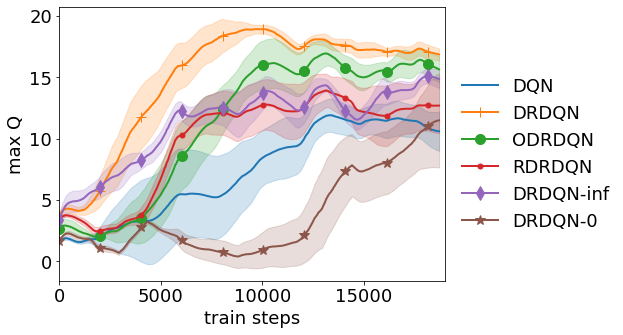

In [80]:
name=['DQN','DRDQN','ODRDQN','RDRDQN','DRDQN-inf','DRDQN-0']
seed=[11200,18300,18500,14000,12100,12200]
# seed=[11200,18300,18500,14000,12000,18800]
opt=[0,3,3,3,3,3,3]
markers=[None, '+', 'o', '.', 'd', '*']
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
colors=sns.color_palette("tab10",len(opt))

fig,ax=plt.subplots(figsize=(9,5))

idx=0
for s,o,name,color in zip(seed,opt,name,colors):
    q_vec=[]
    steps=[]
    for k in range(5):
        for logs in glob.glob('logs/results_log_tfboard_0.005_{}_{}/*.csv'.format(o,s+k)):
            df=pd.read_csv(logs)
            if df.shape[0]<10000:
                continue
            steps.append(df['step'].to_list())
            q_vec.append(df['value'].to_list())
    q_vec_smooth=[moving_average(q,720) for q in q_vec]
    xlim=len(q_vec_smooth[0])
    shade_plot(q_vec_smooth,steps[0][:xlim],ax,name,color,markers[idx],0.5,0.2)
    idx+=1
ax.legend(frameon=False,bbox_to_anchor=(1, 0.8))
ax.set_xlim([0,19000])
ax.set_xlabel('train steps')
ax.set_ylabel('max Q')
plt.tight_layout()
plt.savefig('results/train_maxQ.pdf')

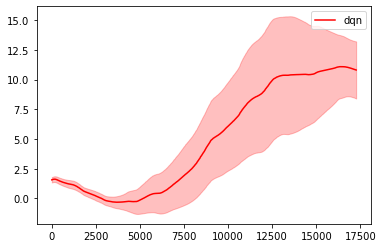